In [7]:
import cv2
import numpy as np

from moviepy.editor import VideoFileClip
from scipy.misc import imresize

from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 
import imagehash

import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

In [57]:
def process(frame):
    frame = imresize(frame, size=(720, 1280), interp='nearest')
    crop = frame[115:608, 309:975]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,10,255,0)
    blur = cv2.GaussianBlur(thresh, (3, 3), 0)
    contours, hierarchy = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in enumerate(contours):       
        (x,y,w,h) = cv2.boundingRect(contour[1])
        if h < 10 or h > 415 or w < 5 or w > 145:
            continue
        x += 309
        y += 115
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 255, 255), 2)
        sprite = Image.fromarray(frame[y:y+h, x:x+w])
#         snip = tagged[y:y+h, x:x+w]
#         hash = str(imagehash.whash(Image.fromarray(snip)))
#         if hash in enemies:
#             #enemies[hash] += 1
#             if enemies[hash] > 100:
#                 eimgs[hash] = snip
#                 x += 309
#                 y += 115
#                 cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 255, 255), 2)
#                 sprite = Image.fromarray(frame[y:y+h, x:x+w])

    return frame

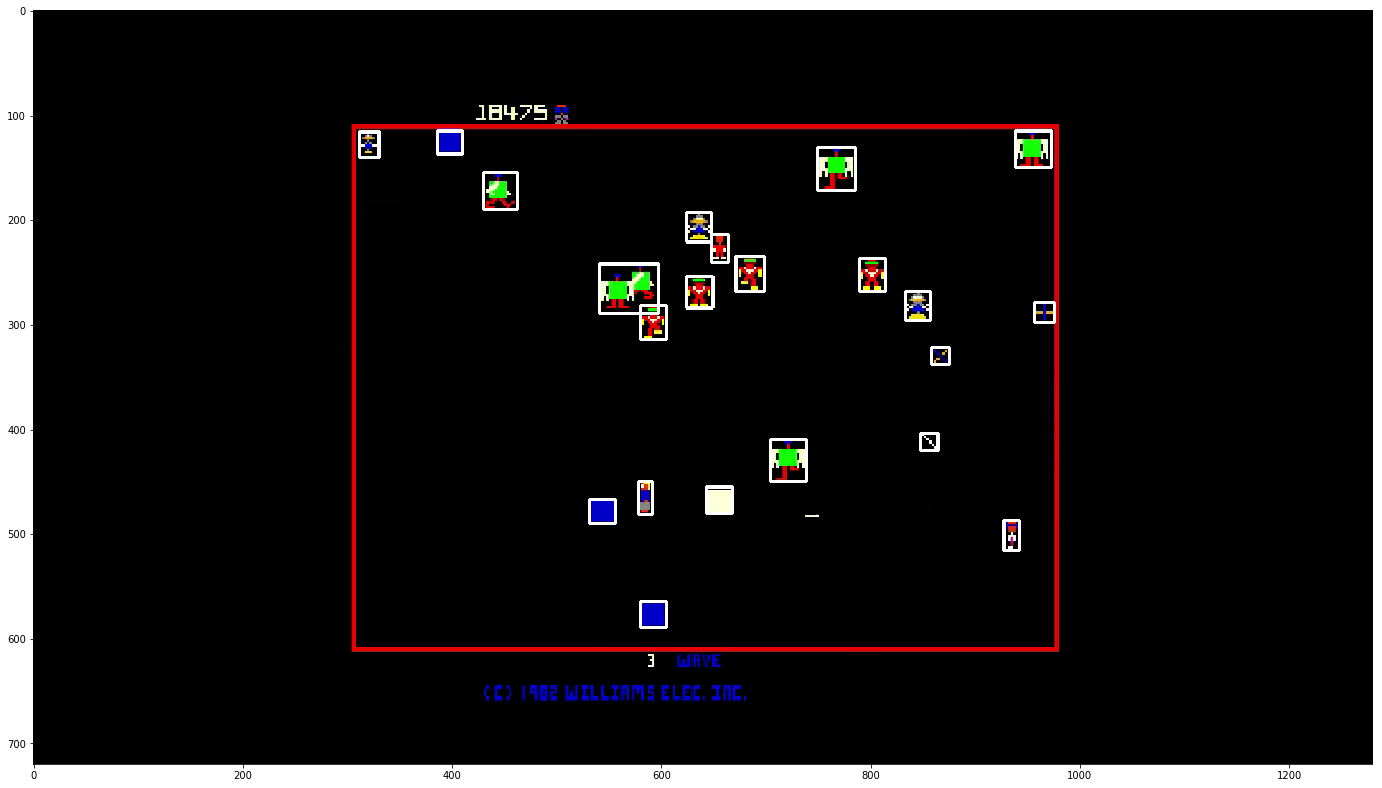

In [62]:
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/robotron-1.mp4')
img = clip.get_frame(101.6)
imshow(process(img))

In [89]:
from scipy.spatial import distance as dist

class Sprite:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.velocity = 0
        self.bearing = 0
        self.sprite = type
        self.certainty = 0
        self.lastSeen = 0
    
    def getXY(self):
        return (self.x, self.y)
        
        
a = {}
a['one'] = Sprite(1, 2, 3, 4)
a['two'] = Sprite(11, 12, 13, 14)
a['three'] = Sprite(11, 12, 13, 14)

o = np.zeros((len(a), 2), dtype="int")

for i, sprite in enumerate(a.keys()):
        o[i] = a[sprite].getXY()

array([[ 1,  2],
       [11, 12],
       [11, 12]])

In [79]:
import math
x1 = 1
y1 = 1
x2 = 1
y2 = 2
bearing = 90 - (180/math.pi)*math.atan2(y2-y1, x2-x1)
bearing

0.0

In [94]:
from scipy.spatial import distance as dist

a = np.array(((0, 0), (10, 10), (20, 20), (30, 30)))
b = np.array(((9, 9), (21, 19), (25, 33), (1, 1), (0, 1)))
d = dist.cdist(a, b)
d

array([[12.72792206, 28.31960452, 41.40048309,  1.41421356,  1.        ],
       [ 1.41421356, 14.2126704 , 27.45906044, 12.72792206, 13.45362405],
       [15.55634919,  1.41421356, 13.92838828, 26.87005769, 27.58622845],
       [29.69848481, 14.2126704 ,  5.83095189, 41.01219331, 41.72529209]])

In [95]:
rows = d.min(axis=1).argsort()
cols = d.argmin(axis=1)[rows]
scols = d.argsort()
print(rows, cols)
print(scols)


[0 1 2 3] [4 0 1 2]
[[4 3 0 1 2]
 [0 3 4 1 2]
 [1 2 0 3 4]
 [2 1 0 3 4]]


In [96]:
for x, y in zip(rows, cols):
    print(x, y)

0 4
1 0
2 1
3 2


In [11]:
import os
path = '/home/strider/Code/robotron/resources/images/sprites/'

    print(f)

hulk
electrode
player
civilians
grunt
